# Outlier Detection and Removal using the Z-Score Method 

![Standard deviation diagram](https://miro.medium.com/v2/resize:fit:1400/0*00JVhutJ-ETMIPeN.png)

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('placement.csv')

In [128]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [129]:
df.shape

(1000, 3)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_4047/518990362.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_4047/518990362.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

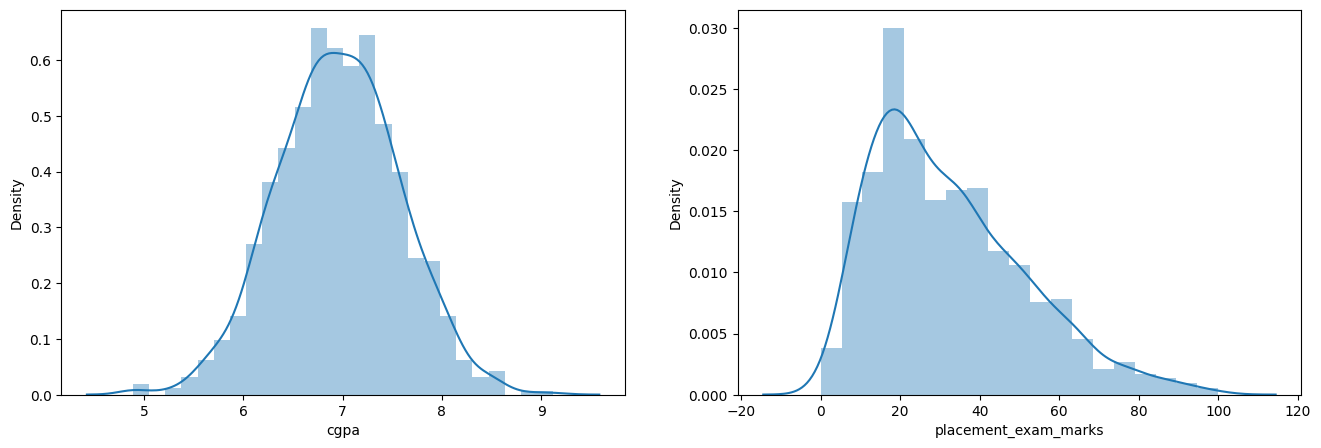

In [130]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

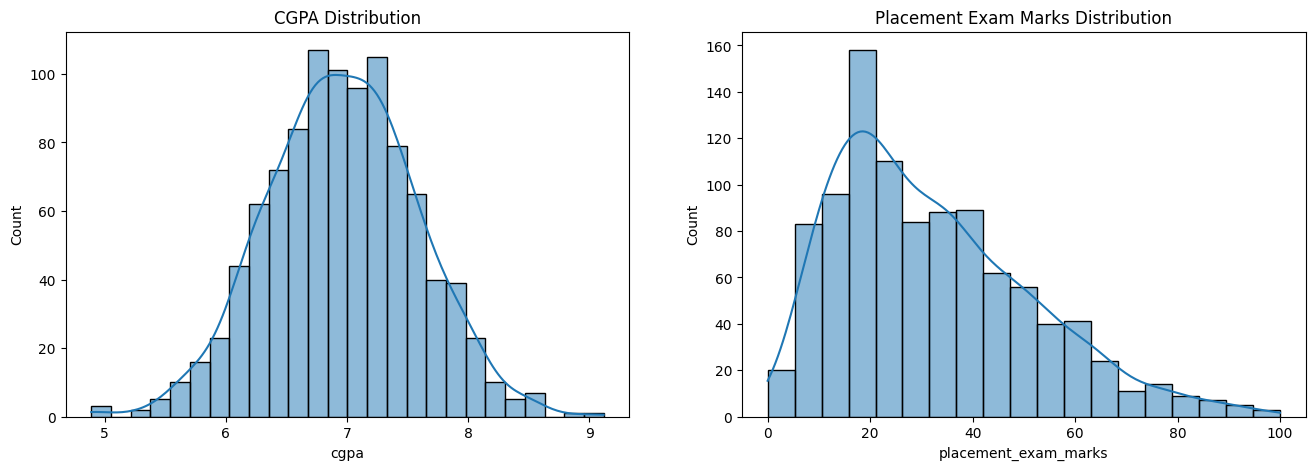

In [131]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Placement Exam Marks Distribution')

plt.show()


In [132]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [133]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [134]:
df['cgpa'].mean() + 3 * df['cgpa'].std()

np.float64(8.808933625397168)

In [135]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [136]:
# Finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming
- Trimming is a method used to handle outliers by removing extreme values completely from the dataset.

In [137]:
# Trimming
new_df = df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Z-Score Formula

\[
Z = \frac{X - \mu}{\sigma}
\]

Where:
- \( Z \) = Z-score  
- \( X \) = Data value  
- \( \mu \) = Mean of the dataset  
- \( \sigma \) = Standard deviation

In [138]:
# Approach 2

# Calculating the Zscore
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [139]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [140]:
df[df['cgpa_zscore'] > 3] # selects extremely high values (positive outliers)

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [141]:
df[df['cgpa_zscore'] < -3] # selects extremely low values (negative outliers)

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [142]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


### Trimming

In [143]:
new_df = df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)] 

In [144]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping

In [145]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [146]:
upper_limit

np.float64(8.808933625397168)

In [147]:
lower_limit

np.float64(5.113546374602832)

In [148]:
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
865,6.77,16.0,0,-0.310506
239,6.71,16.0,1,-0.407925
414,7.30,36.0,1,0.550026
935,8.12,37.0,1,1.881416
56,6.93,15.0,1,-0.050723


In [149]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [150]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [151]:
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
264,7.82,28.0,1,1.394322
931,7.19,33.0,0,0.371425
754,7.91,17.0,0,1.540450
440,8.56,22.0,0,2.595820
559,6.61,58.0,1,-0.570289


In [152]:
df.shape

(1000, 4)

In [153]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64